Plot the locations of the profiles for the different regions. 

In [1]:
import os
import glob
import netCDF4
import logging
import calendar
import numpy as np
import emodnetchemistry
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Polygon
coast = cfeature.GSHHSFeature(scale="i")
from importlib import reload
reload(emodnetchemistry)

<module 'emodnetchemistry' from '/home/ctroupin/Projects/EMODnet/Chemistry/EMODnet-Chemistry/python/emodnetchemistry.py'>

In [2]:
logger = logging.getLogger("EMODnet-Chemistry-Data-positions")
logger.setLevel(logging.DEBUG)
logging.info("Starting")

## Paths

In [3]:
datadir = "/data/EMODnet/Eutrophication/Split/"
figdir = "../figures/EMODnet2022/"
if not os.path.exists(figdir):
    os.makedirs(figdir)

varlist = ["phosphate", "silicate", "ammonium", "chlorophyll-a", 
           "dissolved_inorganic_nitrogen", "dissolved_oxygen"]

logger.debug("Already exists") if os.path.isdir(datadir) else logger.warning("Data directory does not exist")
logger.debug("Already exists") if os.path.isdir(figdir) else os.path.makedirs("figdir")

DEBUG:EMODnet-Chemistry-Data-positions:Already exists
DEBUG:EMODnet-Chemistry-Data-positions:Already exists


### Domains
Taken from another work, coordinates should be adapted.

In [4]:
arctic = emodnetchemistry.Region(-44.25, 70.0, 56.5, 83.0, 0.25, 0.125, "Arctic Sea")
neatlantic = emodnetchemistry.Region(-42.0, -0.1, 24.9, 48.0, 0.1, 0.1, "North-East Atlantic Ocean")
balticsea = emodnetchemistry.Region(9.4, 30.9, 53.0, 65.9, 0.1, 0.1, "Baltic Sea")
blacksea = emodnetchemistry.Region(26.5, 41.95, 40.0, 47.95, 0.05, 0.05, "Black Sea")
mediterranean = emodnetchemistry.Region(-7.0, 36.375, 30.0, 45.875, 0.125, 0.125, "Mediterranean Sea")
northsea = emodnetchemistry.Region(-5.4, 13.0, 47.9, 62.0, 0.1, 0.1, "North Sea")
regionlist = [arctic, blacksea, balticsea, mediterranean, neatlantic, northsea]

In [5]:
regiondict = {"ArcticSea": arctic, "NorthAtlantic": neatlantic, "BalticSea": balticsea, 
              "BlackSea": blacksea, "MediterraneanSea": mediterranean, "NorthSea": northsea}

## Make plot
Define projection

In [6]:
globalproj = ccrs.Orthographic(central_longitude=5.0, central_latitude=50.0, globe=None)
domain = [-45., 70., 24., 83.]

In [50]:
coords_proj = globalproj.transform_points(ccrs.PlateCarree(), lonall, latall)
lonp = coords_proj[:,0]
latp = coords_proj[:,1]

INFO:EMODnet-Chemistry-Data-positions:Working on 10 files
<ipython-input-54-b3ff5682218c>:11: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  hb = ax.hexbin(lonp, latp, bins="log", vmin=1, vmax=100000,


Text(0.5, 1.0, 'Phosphate')

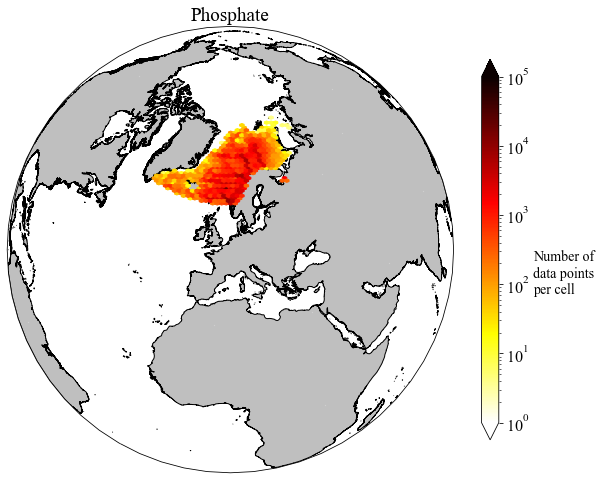

In [54]:
datafilelist = sorted(glob.glob(os.path.join(datadir, f"*{varname}*.nc")))
nfiles = len(datafilelist)
logger.info("Working on {} files".format(nfiles))

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection=globalproj)
xx = np.arange(-180, 180, 30)
yy = np.arange(-90, 90, 30.)
xxx, yyy = np.meshgrid(xx, yy)
ax.plot(xxx.flatten(), yyy.flatten(), "wo", ms=.1, transform=ccrs.PlateCarree(), zorder=5)
hb = ax.hexbin(lonp, latp, bins="log", vmin=1, vmax=100000,
         mincnt=3, gridsize=30, zorder=3, cmap=plt.cm.hot_r)
cb = plt.colorbar(hb, shrink=.7, extend="both")
ax.add_feature(coast, facecolor=".75")
#cb.set_ticks([1., 2., 3., 4., 5.])
#cb.set_ticklabels(["10", "100", "1000", "10000", "100000"])
cb.set_label("Number of\ndata points\nper cell", fontsize=14, rotation=0, ha="left")
plt.title(varname.replace("_", " ").capitalize())

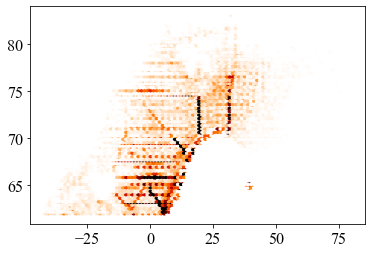

In [37]:
plt.hexbin(lonall, latall, vmin=1., vmax=1000, cmap=plt.cm.gist_heat_r)

In [23]:
for datafile in datafilelist:
    with netCDF4.Dataset(datafile, "r") as nc:
        lon = nc.get_variables_by_attributes(standard_name="longitude")[0][:]
        lat = nc.get_variables_by_attributes(standard_name="latitude")[0][:]

In [13]:
ax.coastlines?

## Loop on variables

In [8]:
reload(emodnetchemistry)
for varname in varlist[0:1]:
    logger.info("Working on variable {}".format(varname))

    figname = os.path.join(figdir, f"EMODnet_positions_{varname}.png")
    logger.info("Saving figure as {}".format(figname))
    emodnetchemistry.plot_data_locations(globalproj, varname, regiondict, figname)
    
    figname = os.path.join(figdir, f"EMODnet_hexbin_{varname}.png")
    logger.info("Saving figure as {}".format(figname))
    emodnetchemistry.plot_hexbin_datalocations(globalproj, varname, figname)

INFO:EMODnet-Chemistry-Data-positions:Working on variable phosphate
INFO:EMODnet-Chemistry-Data-positions:Saving figure as ../figures/EMODnet2022/EMODnet_positions_phosphate.png
INFO:EMODnet-Chemistry-Data-positions:Data files in /data/EMODnet/Eutrophication/Split/
INFO:EMODnet-Chemistry-Data-positions:Working on 10 files
INFO:EMODnet-Chemistry-Data-positions:ArcticSea
INFO:EMODnet-Chemistry-Data-positions:BalticSea
INFO:EMODnet-Chemistry-Data-positions:BalticSea
INFO:EMODnet-Chemistry-Data-positions:BlackSea
INFO:EMODnet-Chemistry-Data-positions:BlackSea
INFO:EMODnet-Chemistry-Data-positions:MediterraneanSea
INFO:EMODnet-Chemistry-Data-positions:MediterraneanSea
INFO:EMODnet-Chemistry-Data-positions:NorthAtlantic
INFO:EMODnet-Chemistry-Data-positions:NorthAtlantic
INFO:EMODnet-Chemistry-Data-positions:NorthSea
INFO:EMODnet-Chemistry-Data-positions:Saving figure as ../figures/EMODnet2022/EMODnet_hexbin_phosphate.png
INFO:EMODnet-Chemistry-Data-positions:Working on 10 files
/home/ctroup

### Month by month

In [29]:
domain = [-45., 70., 24., 83.]
localproj = ccrs.Mercator(central_longitude=0.5 * (domain[0] + domain[1]),
    min_latitude=domain[2],
    max_latitude=domain[3],
    globe=None)

In [47]:
for varname in varlist[0:1]:
    datafilelist = sorted(glob.glob(os.path.join(datadir, f"*{varname}*.nc")))
    lonall, latall, datesall = emodnetchemistry.read_all_positions(m, datafilelist)
    years = [dd.year for dd in datesall]
    months = [dd.month for dd in datesall]

In [50]:
months = np.array(months)
years = np.array(years)
fig = plt.figure(figsize=(8, 12))
for mm in range(1, 13):
    mmm = str(mm).zfill(2)
    logger.info("Working on month {}".format(calendar.month_name[mm]))
    timeselector = np.where(months == mm)[0]
    logger.info("Found {} data points".format(len(timeselector)))
    
    ax = plt.subplot(4, 3, mm)
    plt.title(calendar.month_name[mm])
    m.plot(lonall[timeselector], latall[timeselector], "ko", ms=.2)
    m.fillcontinents(color=".85", zorder=3)
    m.drawcoastlines(linewidth=0.1, zorder=4)

plt.savefig(os.path.join(figdir, f"data_{varname}_month_{mmm}_2"), 
            dpi=300, bbox_inches="tight", facecolor="w",
                    transparent=False)
plt.close()
fig.clf()

INFO:EMODnet-Chemistry-Data-positions:Working on month January
INFO:EMODnet-Chemistry-Data-positions:Found 179855 data points
INFO:EMODnet-Chemistry-Data-positions:Working on month February
INFO:EMODnet-Chemistry-Data-positions:Found 158746 data points
INFO:EMODnet-Chemistry-Data-positions:Working on month March
INFO:EMODnet-Chemistry-Data-positions:Found 171740 data points
INFO:EMODnet-Chemistry-Data-positions:Working on month April
INFO:EMODnet-Chemistry-Data-positions:Found 236651 data points
INFO:EMODnet-Chemistry-Data-positions:Working on month May
INFO:EMODnet-Chemistry-Data-positions:Found 240042 data points
INFO:EMODnet-Chemistry-Data-positions:Working on month June
INFO:EMODnet-Chemistry-Data-positions:Found 250652 data points
INFO:EMODnet-Chemistry-Data-positions:Working on month July
INFO:EMODnet-Chemistry-Data-positions:Found 205917 data points
INFO:EMODnet-Chemistry-Data-positions:Working on month August
INFO:EMODnet-Chemistry-Data-positions:Found 234623 data points
INFO:E

## Specific plot for the Arctic Sea

In [14]:
varname = varlist[-1]
datafilelist = sorted(glob.glob(os.path.join(datadir, f"*{varname}*.nc")))
datafile = datafilelist[0]
logger.info("Working on file {}".format(datafile))

INFO:EMODnet-Chemistry-Data-positions:Working on file /data/EMODnet/Eutrophication/Split/ArcticSea_Water_body_dissolved_oxygen_concentration.nc


In [29]:
with netCDF4.Dataset(datafile) as nc:
    obslon = nc.variables["obslon"][:]
    obslon[obslon > 180] -= 360.
    obslat = nc.variables["obslat"][:]
    obsdepth = nc.variables["obsdepth"][:]
    obstime = nc.variables["obstime"][:]
    fieldname = list( nc.variables.keys())[-1]
    obsval = nc.variables[fieldname][:]

In [35]:
gooddepth = np.where(obsdepth < 2)[0]

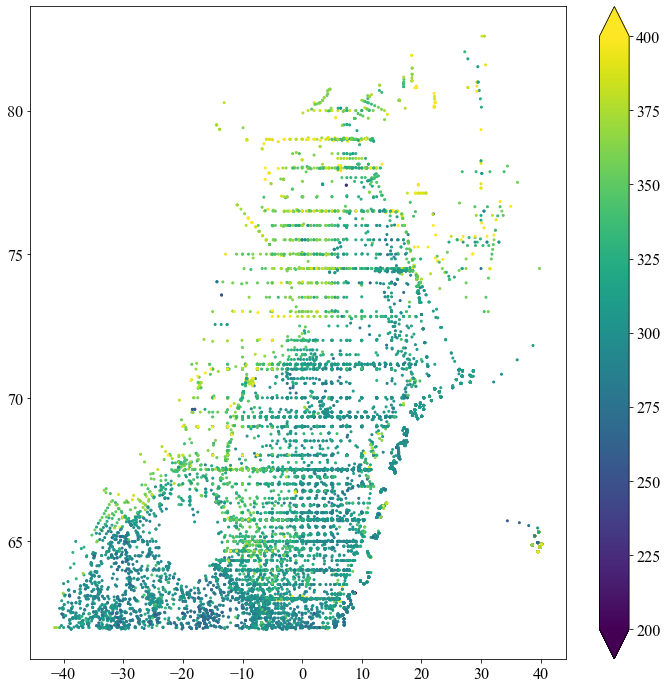

In [38]:
fig = plt.figure(figsize=(12, 12))
ax = plt.subplot(111)
plt.scatter(obslon[gooddepth], obslat[gooddepth], s=4, c=obsval[gooddepth], vmin=200., vmax=400.)
plt.colorbar(extend="both")
plt.show()
plt.close()